# Programacion Dinamica Grafos



In [5]:
class abstract_graph:
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges} | {v for u,v in self.edges}
    
    def adjacency_list(self):
        pass
    
class weighted_graph(abstract_graph):
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges.keys()} | {v for u,v in self.edges.keys()}    
    
    def adjacency_list(self):
        adjacent=lambda n : {v:self.edges[(u,v)] for u,v in self.edges.keys() if u==n }
        return {v:adjacent(v) for v in self.nodes}

In [6]:
import heapq
import numpy as np

def dijkstra(G,start):
    if start not in G.nodes:
        return None
    neighbors=G.adjacency_list()
    path={}    
    path.update({start:None})
    distance={}
    distance.update({start:0})
    frontier=[]
    heapq.heappush(frontier,(0,start))
    while frontier:
        dist_u,u=heapq.heappop(frontier)
        for v in neighbors[u]:
            dist_v=dist_u+G.edges[(u,v)]
            if v not in distance.keys() or dist_v<distance[v]:
                path.update({v:u})
                distance.update({v:dist_v})
                heapq.heappush(frontier,(dist_v,v))
    return path,distance

def bellman_ford(G,start):
    if start not in G.nodes:
        return None
    neighbors=G.adjacency_list()
    path={}    
    path.update({start:None})
    distance={v:float('inf') for v in G.nodes}
    distance.update({start:0})
    for i in range(len(G.nodes)-1):
        for (u,v) in G.edges.keys():
            dist_v=distance[u]+G.edges[(u,v)]
            if dist_v<distance[v]:
                path.update({v:u})
                distance.update({v:dist_v})
    return path,distance

def shortest_path(parent,end):
    path=[end]
    k=end
    while k is not None:
        path.append(parent[k])
        k=parent[k]
    return path[:-1][::-1]

In [7]:
random_graph = lambda n,p : {(u,v):np.random.randint(1,10) for u in np.arange(n) for v 
                    in np.arange(n) if np.random.rand()>p and u!=v}
# cantidad de vértices
n=10
# 1- probabilidad de crear aristas
p=0.9

E=random_graph(n,p)

G=weighted_graph(E)
# chequear que el grafo sea conexo y que el vértice inicial exista!
start=0
path,distance=dijkstra(G,start)

In [8]:
import time

n=100
# 1- probabilidad de crear aristas
p=0.3

E=random_graph(n,p)
G=weighted_graph(E)

t1=time.clock()
p,d=dijkstra(G,0)
t2=time.clock()
print('Dijkstra Tiempo : {0:0.5f}'.format(t2-t1))

t3=time.clock()
p,d=bellman_ford(G,0)
t4=time.clock()
print('Bellman Ford Tiempo : {0:0.5f}'.format(t4-t3))

Dijkstra Tiempo : 0.03884
Bellman Ford Tiempo : 0.17316


# Tarea

En esta tarea Ud. debe comprobar las siguientes hipótesis:

    1.) La complejidad del algoritmo Dijsktra depende de la cantidad de aristas del grafo.
    2.) El peor caso del algoritmo Bellman-Ford se produce cuando el grafo es denso (gran cantidad de aristas).
    3.) Cuando se requiere calcular las distancias más cortas entre todos los vértices del grafo, independiente de la cantidad de vértices el algoritmo Floyd-Warshall mejora el tiempo de ejecución de la fuerza bruta.

In [49]:
import time

n=1000
# 1- probabilidad de crear aristas
p=0.3

E=random_graph(n,p)
G=weighted_graph(E)

t1=time.clock()
p,d=dijkstra(G,0)
t2=time.clock()
print('Dijkstra Tiempo : {0:0.5f}'.format(t2-t1))

t3=time.clock()
p,d=bellman_ford(G,0)
t4=time.clock()
print('Bellman Ford Tiempo : {0:0.5f}'.format(t4-t3))

Dijkstra Tiempo : 38.00020
Bellman Ford Tiempo : 303.26168


In [9]:
import numpy as np
import time
import pandas as pd

def run_experiment(n,method,p=0.5,n_samp=10):
    ellapsed_time={m:[] for m in method}
    s_n=[]
    p_n=[]
    for n in n:
      for prob in p:
        for j in range(n_samp):
            s_n.append(n)
            p_n.append(prob)
            E=random_graph(n,prob)
            G=weighted_graph(E)
            for m in method:
                start=time.clock()
                eval(m+"(G,0)")
                end=time.clock()
                ellapsed_time[m].append(end-start)
    df_list=[]
    for m in method:
      j=len(ellapsed_time[m])
      df=pd.DataFrame({'n':s_n,'time':ellapsed_time[m],'method':[m]*j,'p':p_n})
      df_list.append(df)
    df_average=pd.concat(df_list,axis=0)
    return df_average

In [10]:
method=['dijkstra','bellman_ford']

n=[100,200,300]
p=[0.3,0.5,0.9]

df=run_experiment(n,method,p,n_samp=10)

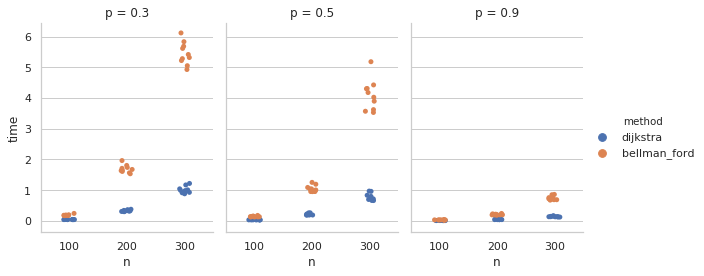

In [12]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

sns.catplot(x="n", y="time",hue="method", col="p",height=4, aspect=.7, data=df)
plt.show()

In [13]:
df1=df[df['method']=='dijkstra']
df2=df[df['method']=='bellman_ford']

df1.groupby(['p','n']).mean()

time
p   n            
0.3 100  0.039149
    200  0.326177
    300  1.008524
0.5 100  0.031398
    200  0.211751
    300  0.773520
0.9 100  0.006345
    200  0.039852
    300  0.135730

In [14]:
df2.groupby(['p','n']).mean()

time
p   n            
0.3 100  0.182430
    200  1.685375
    300  5.445786
0.5 100  0.138972
    200  1.041372
    300  4.102306
0.9 100  0.027742
    200  0.202469
    300  0.739842

In [15]:
from scipy.stats import ttest_ind

cat1=df1[df1['p']==0.3]
cat2=df1[df1['p']==0.9]

ttest_ind(cat1['time'], cat2['time'])

Ttest_indResult(statistic=5.157963823641714, pvalue=3.162065672365701e-06)

In [16]:
cat1=df2[df2['p']==0.3]
cat2=df2[df2['p']==0.9]

ttest_ind(cat1['time'], cat2['time'])

Ttest_indResult(statistic=5.072839235500257, pvalue=4.313299829888708e-06)